In [13]:
import pandas as pd

tokens_df = pd.read_csv("results/tokens.tsv", names=["gallery", "notation", "spec", "token"], delimiter="\t")

df = tokens_df.query("gallery == 'movies'").groupby(["spec", "notation"])["token"].nunique().reset_index()
df

,spec,notation,token
0,area_colored,ggplot2,28
1,area_colored,plotly_express,31
2,area_colored,vega-lite,27
3,area_colored_stacked,ggplot2,29
4,area_colored_stacked,plotly_express,33
...,...,...,...
85,scatter_ols_global,plotly_express,27
86,scatter_ols_global,vega-lite,33
87,scatter_ols_separate,ggplot2,25
88,scatter_ols_separate,plotly_express,25


In [6]:
from src.distances import load_distances

In [10]:
dist = load_distances().query("gallery == 'movies'")

In [17]:
dist

,gallery,notation,from_spec,to_spec,difflib,a,b,ab,nmi,cd,ncd
1238,movies,ggplot2,bar_count_horizontal,bar_count_ordered,4,160,172,184,36,24,139
1239,movies,ggplot2,bar_count_horizontal,bar_budget,13,160,204,212,60,52,254
1240,movies,ggplot2,bar_count_horizontal,box,6,160,184,196,48,36,195
1241,movies,ggplot2,bar_count_horizontal,heatmap_budget_avg,18,160,224,236,88,76,339
1242,movies,ggplot2,bar_count_horizontal,bar_count,1,160,160,168,16,8,50
...,...,...,...,...,...,...,...,...,...,...,...
3843,movies,vega-lite,bar_count_100,scatter_ols_global,77,252,328,380,180,128,390
3844,movies,vega-lite,bar_count_100,bar_count,20,252,208,260,60,52,206
3845,movies,vega-lite,bar_count_100,line,25,252,260,328,144,76,292
3846,movies,vega-lite,bar_count_100,area_colored,14,252,284,324,112,72,253


,notation,from_spec,a
0,ggplot2,area_colored,252
1,ggplot2,area_colored_stacked,264
2,ggplot2,bar_budget,204
3,ggplot2,bar_budget_avg,208
4,ggplot2,bar_budget_avg_colored,236
...,...,...,...
85,vega-lite,scatter_colored,256
86,vega-lite,scatter_colored_continuous,252
87,vega-lite,scatter_colored_symbol,272
88,vega-lite,scatter_ols_global,328


In [20]:
df

,spec,notation,token
0,area_colored,ggplot2,28
1,area_colored,plotly_express,31
2,area_colored,vega-lite,27
3,area_colored_stacked,ggplot2,29
4,area_colored_stacked,plotly_express,33
...,...,...,...
85,scatter_ols_global,plotly_express,27
86,scatter_ols_global,vega-lite,33
87,scatter_ols_separate,ggplot2,25
88,scatter_ols_separate,plotly_express,25


In [32]:
perspec = dist.groupby(["notation", "from_spec"]).agg({'a' : ['mean'], 'nmi' : ['median']}).reset_index()
perspec.columns = ["notation", "spec", "size", "median_nmi"]
perspec

,notation,spec,size,median_nmi
0,ggplot2,area_colored,252,136
1,ggplot2,area_colored_stacked,264,144
2,ggplot2,bar_budget,204,80
3,ggplot2,bar_budget_avg,208,84
4,ggplot2,bar_budget_avg_colored,236,100
...,...,...,...,...
85,vega-lite,scatter_colored,256,88
86,vega-lite,scatter_colored_continuous,252,104
87,vega-lite,scatter_colored_symbol,272,100
88,vega-lite,scatter_ols_global,328,168


In [34]:
import plotly.express as px

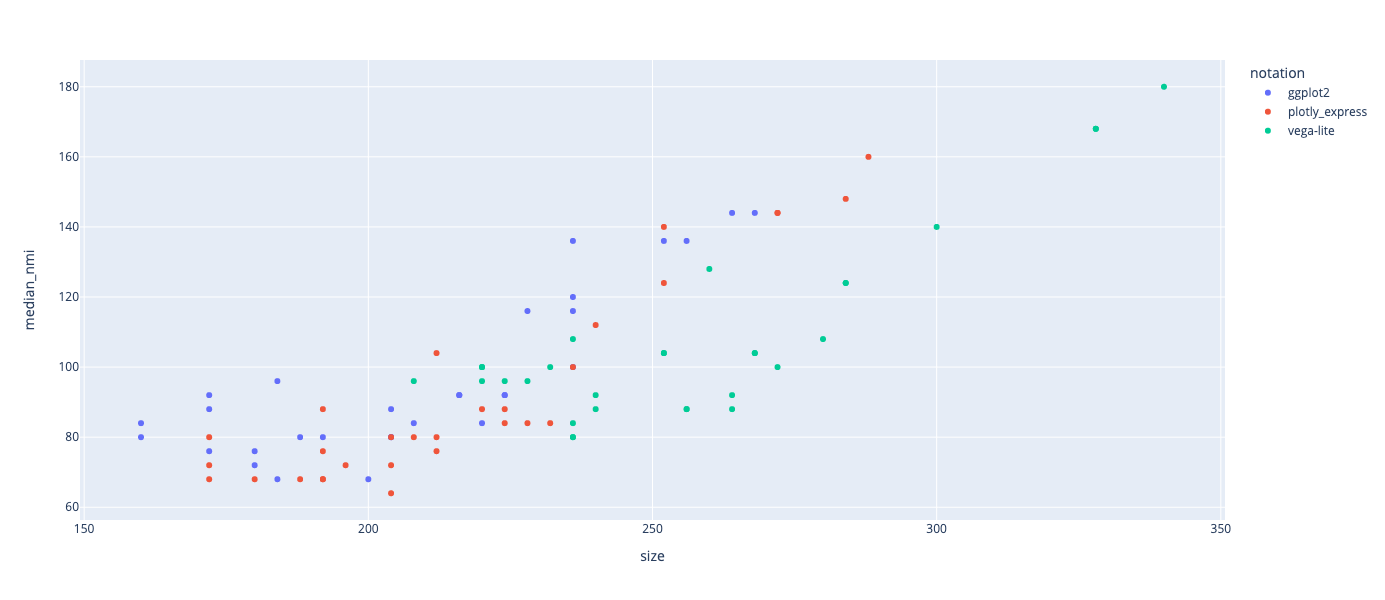

In [40]:
px.scatter(perspec, x="size", y="median_nmi", color="notation", hover_name="spec", height=600, width=600)